# Importing the Data and required libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
plt.rcParams['figure.figsize']=[11,7]
plt.style.use("ggplot")

In [9]:
# Here we imported the data, and set the Date column to be: datetime not object 
office_df=pd.read_csv('the_office_series.csv',parse_dates=['Date'])
df=office_df.copy()

# Data preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    188 non-null    int64         
 1   Season        188 non-null    int64         
 2   EpisodeTitle  188 non-null    object        
 3   About         188 non-null    object        
 4   Ratings       188 non-null    float64       
 5   Votes         188 non-null    int64         
 6   Viewership    188 non-null    float64       
 7   Duration      188 non-null    int64         
 8   Date          188 non-null    datetime64[ns]
 9   GuestStars    29 non-null     object        
 10  Director      188 non-null    object        
 11  Writers       188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 17.8+ KB


In [14]:
# Check null values in a dataset
df.isna().sum()


Unnamed: 0        0
Season            0
EpisodeTitle      0
About             0
Ratings           0
Votes             0
Viewership        0
Duration          0
Date              0
GuestStars      159
Director          0
Writers           0
dtype: int64

In [15]:
# change the name of the first column to be episode_number
df.rename(columns={'Unnamed: 0':'episode_number'},inplace=True)
df.head()

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels


In [16]:
# create 'has_guests' column that contains boolean values for whether there is a guest star or not
guest=df.GuestStars.isnull()
has_guest=[False if i else True for i in guest]
has_guest
df['has_guests']=has_guest
df.head()

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,has_guests
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False


In [17]:
# make color column that contains colors for each episode according to its rating
colors = ["red", "orange", "lightgreen", "darkgreen"]
ratings=df['Ratings']
q1=ratings.quantile(0.25)
q2=ratings.quantile(0.5)
q3=ratings.quantile(0.75)
q4=ratings.max()

quantile_list=[q1,q2,q3,q4]
quantile_list

[7.8, 8.2, 8.6, 9.8]

In [18]:
indexed_color_dict={}
for i in range(len(quantile_list)):
    indexed_color_dict[quantile_list[i]]=colors[i]
indexed_color_dict

{7.8: 'red', 8.2: 'orange', 8.6: 'lightgreen', 9.8: 'darkgreen'}

In [19]:
def colorize(rating, indexed_color_dict):
    for key in indexed_color_dict:
        if float(key) >= rating:
            return indexed_color_dict[key]

In [20]:
df['Coloring'] = df['Ratings'].apply(colorize, args = (indexed_color_dict, ))

# Exploratory Data analysis 

In [21]:
df.head()

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,has_guests,Coloring
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,red
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,red
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,orange
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,lightgreen


In [22]:
size=[]
for ind,row in df.iterrows():
    if row['has_guests']==True:
        size.append(250)
    else:
        size.append(25)
df['Size']= size
df.head(4)

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,has_guests,Coloring,Size
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,red,25
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,lightgreen,25
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,red,25
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,orange,25


In [ ]:
sns.pointplot(x="Date",
y="Viewership", 
hue="sex",
data=titanic,
palette={"male":"g",
"female":"m"},
markers=["^","o"],
linestyles=["-","--"])

In [62]:
 # Below is the interactive chart which shows viewership across the years
fig = px.scatter(df, x="Date", y="Viewership",title="Scatter plot displays relationship between  Years and viewership",
                 color="Coloring", size='Size' )

fig.show()

In [55]:
# Here we will make two dataframes, one for the episodes that has guest stars and one that has not
guests_df=df[df['has_guests']==True]
non_guests_df=df[df['has_guests']==False]

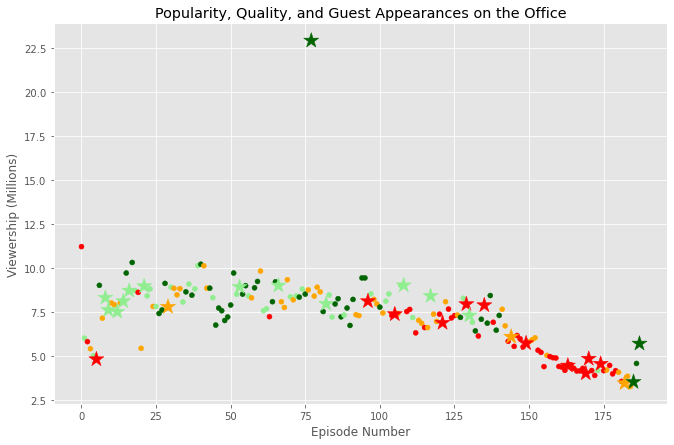

In [25]:
fig = plt.figure()
# plotting using scatter plots two dataframes, the first one that contains data
# with existence of guest stars, The other one for data with no guest stars with 
# different markers

plt.scatter(x=non_guests_df.episode_number,y=non_guests_df.Viewership,
            c=non_guests_df.Coloring,
            s=non_guests_df.Size)

plt.scatter(x=guests_df.episode_number,y=guests_df.Viewership,
           c=guests_df.Coloring,
            s=guests_df.Size,marker='*')


plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

In [68]:
# the number of episode with relative high viewership 
max_view=df['Viewership'].max()
df[df['Viewership']==max_view]


,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,has_guests,Coloring,Size
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,darkgreen,250


In [69]:
# we get the names of guest stars in that episode
top_star=df[df['Viewership']==max_view]['GuestStars']
top_star

77    Cloris Leachman, Jack Black, Jessica Alba
Name: GuestStars, dtype: object

In [82]:
# In this case we count the number of episodes in each season
e=df.groupby(('Season'),as_index=False).count()
e=e[['Season','episode_number']]
e.rename(columns={'episode_number':'NoOfEpisodes'},inplace=True)
fig = px.bar(e, x="Season", y="NoOfEpisodes",title="Season and Number of episods bar chart")
fig.show()

In [90]:
# Grouping the data by season and calculate the average of the ratings for each season
rating=df.groupby('Season')['Ratings'].mean()

fig = px.line( rating,
              title = 'Season Vs Rating line graph')

fig.show()